In [151]:
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
import numpy as np
import warnings
warnings.filterwarnings('ignore')


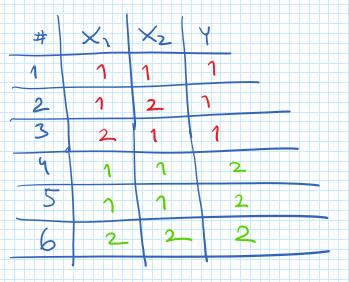

In [152]:
x = np.array([
              [1, 1], # 1
              [1, 2], # 1
              [2, 1], # 1    
 #             [1, 1], # 2  
              [1, 1], # 2 
              [2, 2], # 2                        
              ])
x

array([[1, 1],
       [1, 2],
       [2, 1],
       [1, 1],
       [2, 2]])

In [153]:
y = np.array([1, 
              1, 
              1, 
              #2, 
              2, 
              2])
y

array([1, 1, 1, 2, 2])

Gaussian Naive Bayes

In [154]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x, y)
newX = np.array([2, 1])
gaussian_nb.predict([newX])

array([1])

In [155]:
gaussian_nb.predict_proba([newX])

array([[0.56789015, 0.43210985]])

Multinomial Naive Bayes

In [156]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x, y)
newX = np.array([2, 1])
multinomial_nb.predict([newX])

array([1])

In [157]:
multinomial_nb.predict_proba([newX])

array([[0.6, 0.4]])

Complement Naive Bayes

In [158]:
complement_nb = ComplementNB()
complement_nb.fit(x, y)
newX = np.array([2, 1])
complement_nb.predict([newX])

array([1])

In [159]:
complement_nb.predict_proba([newX])

array([[0.5, 0.5]])

Bernoulli Naive Bayes

In [160]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(x, y)
newX = np.array([2, 1])
bernoulli_nb.predict([newX])

array([1])

In [161]:
bernoulli_nb.predict_proba([newX])

array([[0.63054187, 0.36945813]])

Categorical Naive Bayes

In [162]:
categorical_nb = CategoricalNB()
categorical_nb.fit(x, y)
newX = np.array([2, 1])
categorical_nb.predict([newX])

array([1])

In [163]:
categorical_nb.predict_proba([newX])

array([[0.6097561, 0.3902439]])

Compare all methods

In [164]:
from sklearn import model_selection

# prepare configuration for cross validation test harness
seed = 2

# prepare models
models = []
models.append(('GNB', GaussianNB()))
models.append(('MNB', MultinomialNB()))
models.append(('CNB', ComplementNB()))
models.append(('BNB', BernoulliNB()))
models.append(('CatNB', CategoricalNB()))

In [165]:
results = []
names = []
scoring = 'accuracy'

In [166]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(cv_results)
    print(msg)
    print("---------")

[1. 0. 0. 0. 0.]
GNB: 0.200000 (0.400000)
---------
[1. 0. 0. 0. 0.]
MNB: 0.200000 (0.400000)
---------
[1. 0. 0. 0. 0.]
CNB: 0.200000 (0.400000)
---------
[1. 1. 1. 0. 0.]
BNB: 0.600000 (0.489898)
---------
[1. 0. 0. 0. 0.]
CatNB: 0.200000 (0.400000)
---------


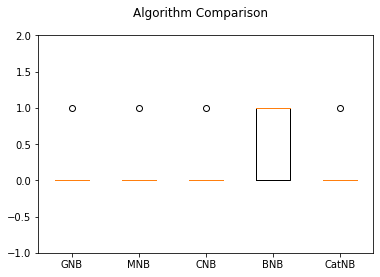

In [177]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.margins(y=1)
plt.show()

[Source](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/)